In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [9]:
from load_data import CsvDataLoader

csv_loader = CsvDataLoader('./')
df = csv_loader.read_datasets()

# Compute pearson corellation

In [10]:
# 1 kid vs more kids in years
one_kid = df['1']
more_kids = df['total'] - one_kid
scipy.stats.pearsonr(one_kid, more_kids)



(0.9808822902517857, 3.4558646725411617e-171)

In [15]:
for reg_name, reg in df.groupby(['region']):
    r, _ = scipy.stats.pearsonr(reg['1'], reg['total'] - reg['1'])
    print('{} = {:.3f}'.format(reg_name, r))
    
#seaborn.barplot(rl)

DOLNOŚLĄSKIE = 0.414
KUJAWSKO-POMORSKIE = 0.590
LUBELSKIE = 0.685
LUBUSKIE = 0.330
MAZOWIECKIE = 0.725
MAŁOPOLSKIE = 0.673
OPOLSKIE = 0.265
PODKARPACKIE = 0.419
PODLASKIE = 0.223
POMORSKIE = 0.592
WARMIŃSKO-MAZURSKIE = 0.716
WIELKOPOLSKIE = 0.555
ZACHODNIOPOMORSKIE = 0.420
ŁÓDZKIE = 0.587
ŚLĄSKIE = 0.385
ŚWIĘTOKRZYSKIE = 0.745


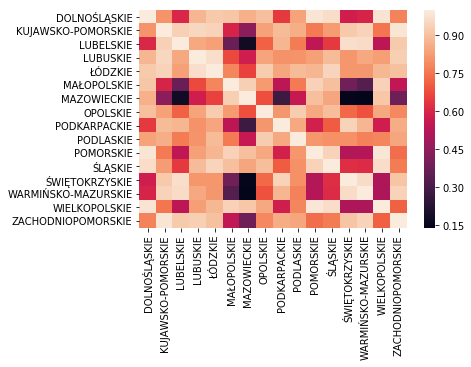

In [14]:
import itertools
import seaborn

regions = df['region'].unique().tolist()
df_regions = pd.DataFrame(0, index=regions, columns=regions, dtype=np.float32)
_df_reg = df.groupby(['region', 'year']).mean()

for (prov1, _df1), (prov2, _df2) in itertools.product(_df_reg.groupby(level=0)['total'], repeat=2):
    r, _ = scipy.stats.pearsonr(_df1, _df2)
    df_regions[prov1][prov2] = r

seaborn.heatmap(df_regions)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

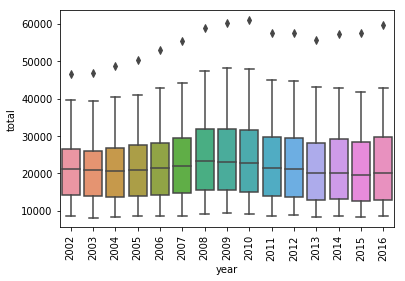

In [18]:
seaborn.boxplot(x=df['year'], y=df['total'])
plt.xticks(rotation=90)